<a href="https://colab.research.google.com/github/TomasMendozaHN/ICDF_Class/blob/main/05112022_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [2]:
!mkdir ~/.kaggle #mkdir = make directory
!cp kaggle.json ~/.kaggle/  # cp = copy
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 58.1MB/s]


In [4]:
!unzip stock-time-series-20050101-to-20171231.zip

Archive:  stock-time-series-20050101-to-20171231.zip
  inflating: AABA_2006-01-01_to_2018-01-01.csv  
  inflating: AAPL_2006-01-01_to_2018-01-01.csv  
  inflating: AMZN_2006-01-01_to_2018-01-01.csv  
  inflating: AXP_2006-01-01_to_2018-01-01.csv  
  inflating: BA_2006-01-01_to_2018-01-01.csv  
  inflating: CAT_2006-01-01_to_2018-01-01.csv  
  inflating: CSCO_2006-01-01_to_2018-01-01.csv  
  inflating: CVX_2006-01-01_to_2018-01-01.csv  
  inflating: DIS_2006-01-01_to_2018-01-01.csv  
  inflating: GE_2006-01-01_to_2018-01-01.csv  
  inflating: GOOGL_2006-01-01_to_2018-01-01.csv  
  inflating: GS_2006-01-01_to_2018-01-01.csv  
  inflating: HD_2006-01-01_to_2018-01-01.csv  
  inflating: IBM_2006-01-01_to_2018-01-01.csv  
  inflating: INTC_2006-01-01_to_2018-01-01.csv  
  inflating: JNJ_2006-01-01_to_2018-01-01.csv  
  inflating: JPM_2006-01-01_to_2018-01-01.csv  
  inflating: KO_2006-01-01_to_2018-01-01.csv  
  inflating: MCD_2006-01-01_to_2018-01-01.csv  
  inflating: MMM_2006-01-01_to_20

In [5]:
import numpy as np
import pandas as pd

In [6]:
import os
for filename in os.listdir():
  if filename.endswith('.csv'):
    print(filename)

VZ_2006-01-01_to_2018-01-01.csv
NKE_2006-01-01_to_2018-01-01.csv
CAT_2006-01-01_to_2018-01-01.csv
DIS_2006-01-01_to_2018-01-01.csv
GE_2006-01-01_to_2018-01-01.csv
JPM_2006-01-01_to_2018-01-01.csv
KO_2006-01-01_to_2018-01-01.csv
UNH_2006-01-01_to_2018-01-01.csv
JNJ_2006-01-01_to_2018-01-01.csv
WMT_2006-01-01_to_2018-01-01.csv
GS_2006-01-01_to_2018-01-01.csv
UTX_2006-01-01_to_2018-01-01.csv
MMM_2006-01-01_to_2018-01-01.csv
TRV_2006-01-01_to_2018-01-01.csv
CSCO_2006-01-01_to_2018-01-01.csv
IBM_2006-01-01_to_2018-01-01.csv
XOM_2006-01-01_to_2018-01-01.csv
MRK_2006-01-01_to_2018-01-01.csv
PFE_2006-01-01_to_2018-01-01.csv
CVX_2006-01-01_to_2018-01-01.csv
INTC_2006-01-01_to_2018-01-01.csv
MSFT_2006-01-01_to_2018-01-01.csv
AXP_2006-01-01_to_2018-01-01.csv
all_stocks_2017-01-01_to_2018-01-01.csv
GOOGL_2006-01-01_to_2018-01-01.csv
MCD_2006-01-01_to_2018-01-01.csv
AMZN_2006-01-01_to_2018-01-01.csv
BA_2006-01-01_to_2018-01-01.csv
AABA_2006-01-01_to_2018-01-01.csv
PG_2006-01-01_to_2018-01-01.csv
AA

In [7]:
filepath = 'AMZN_2006-01-01_to_2018-01-01.csv'
data = pd.read_csv(filepath)
data = data.sort_values('Date')
data.head()

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,47.47,47.85,46.25,47.58,7582127,AMZN
1,2006-01-04,47.48,47.73,46.69,47.25,7440914,AMZN
2,2006-01-05,47.16,48.20,47.11,47.65,5417258,AMZN
3,2006-01-06,47.97,48.58,47.32,47.87,6154285,AMZN
4,2006-01-09,46.55,47.10,46.40,47.08,8945056,AMZN


# Visualize Amazon's Stock Price

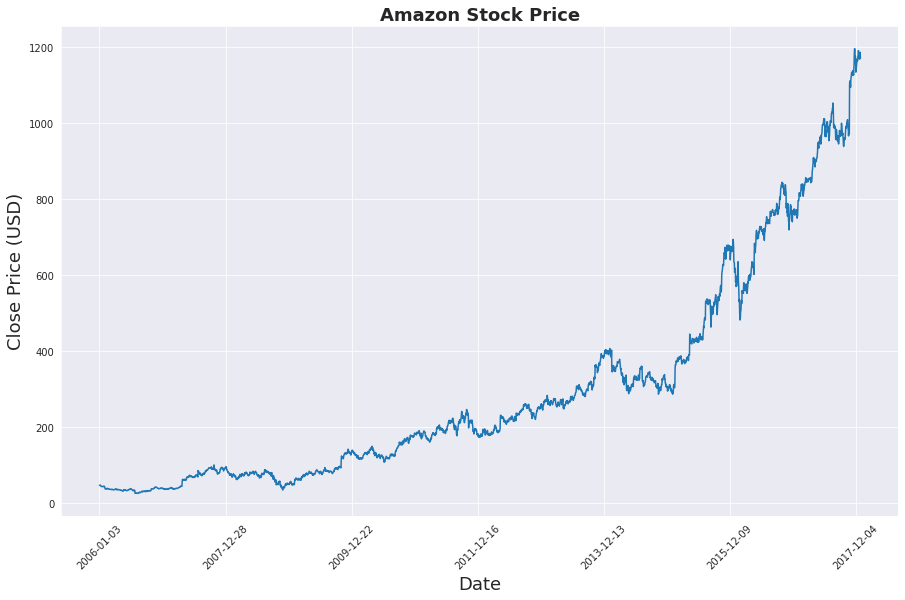

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(data[['Close']])
plt.xticks(range(0,data.shape[0],500),data['Date'].loc[::500],rotation=45)
plt.title("Amazon Stock Price",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price (USD)',fontsize=18)
plt.show()

In [9]:
price = data[['Close']]
price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3019 non-null   float64
dtypes: float64(1)
memory usage: 47.2 KB


In [10]:
price['Close']

0         47.58
1         47.25
2         47.65
3         47.87
4         47.08
         ...   
3014    1168.36
3015    1176.76
3016    1182.26
3017    1186.10
3018    1169.47
Name: Close, Length: 3019, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
price['Close'] = scaler.fit_transform(price['Close'].values.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [12]:
price['Close']

0      -0.963223
1      -0.963787
2      -0.963104
3      -0.962727
4      -0.964078
          ...   
3014    0.953033
3015    0.967395
3016    0.976799
3017    0.983364
3018    0.954931
Name: Close, Length: 3019, dtype: float64

# Example how to prepare the data:

In [22]:
stock_data_raw = price.to_numpy()
print(stock_data_raw.shape)

data_temp = []

for index in range(len(stock_data_raw) - 20):
  data_temp.append(stock_data_raw[index: index + 20])

data_temp = np.array(data_temp)
print(data_temp[0])
print(data_temp[1])

(3019, 1)
[[-0.96322323]
 [-0.96378744]
 [-0.96310354]
 [-0.9627274 ]
 [-0.9640781 ]
 [-0.96652305]
 [-0.96775407]
 [-0.96872863]
 [-0.96866024]
 [-0.96934414]
 [-0.96879702]
 [-0.96857475]
 [-0.96948092]
 [-0.96980577]
 [-0.96930994]
 [-0.97002804]
 [-0.96818151]
 [-0.96725824]
 [-0.96770278]
 [-0.96794214]]
[[-0.96378744]
 [-0.96310354]
 [-0.9627274 ]
 [-0.9640781 ]
 [-0.96652305]
 [-0.96775407]
 [-0.96872863]
 [-0.96866024]
 [-0.96934414]
 [-0.96879702]
 [-0.96857475]
 [-0.96948092]
 [-0.96980577]
 [-0.96930994]
 [-0.97002804]
 [-0.96818151]
 [-0.96725824]
 [-0.96770278]
 [-0.96794214]
 [-0.96937833]]


In [13]:
def split_data(stock, lookback):
    data_raw = stock.to_numpy() # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    x_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    x_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [x_train, y_train, x_test, y_test]

In [14]:
lookback = 20 # choose sequence length
x_train, y_train, x_test, y_test = split_data(price, lookback)
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ',y_train.shape)
print('x_test.shape = ',x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2399, 19, 1)
y_train.shape =  (2399, 1)
x_test.shape =  (600, 19, 1)
y_test.shape =  (600, 1)


In [18]:
import torch
import torch.nn as nn

x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train_lstm = torch.from_numpy(y_train).type(torch.Tensor)
y_test_lstm = torch.from_numpy(y_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [23]:
input_dim = 1
hidden_dim = 32
num_layers = 2
output_dim = 1
num_epochs = 100

In [24]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [25]:
model = LSTM(input_dim=input_dim, hidden_dim=hidden_dim, output_dim=output_dim, num_layers=num_layers)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [26]:
import time

hist = np.zeros(num_epochs)
start_time = time.time()
lstm = []

for t in range(num_epochs):
    y_train_pred = model(x_train)

    loss = criterion(y_train_pred, y_train_lstm)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()
    
training_time = time.time()-start_time
print("Training time: {}".format(training_time))

Epoch  0 MSE:  0.9129181504249573
Epoch  1 MSE:  0.6559311747550964
Epoch  2 MSE:  0.4051946699619293
Epoch  3 MSE:  0.12398150563240051
Epoch  4 MSE:  0.06607614457607269
Epoch  5 MSE:  0.13627786934375763
Epoch  6 MSE:  0.08648700267076492
Epoch  7 MSE:  0.0439014658331871
Epoch  8 MSE:  0.0383208692073822
Epoch  9 MSE:  0.05138073116540909
Epoch  10 MSE:  0.06318943947553635
Epoch  11 MSE:  0.06620898097753525
Epoch  12 MSE:  0.06154971197247505
Epoch  13 MSE:  0.0531436987221241
Epoch  14 MSE:  0.04488958790898323
Epoch  15 MSE:  0.03952600434422493
Epoch  16 MSE:  0.03817886859178543
Epoch  17 MSE:  0.040265042334795
Epoch  18 MSE:  0.043880678713321686
Epoch  19 MSE:  0.04677526280283928
Epoch  20 MSE:  0.04749532416462898
Epoch  21 MSE:  0.04595829173922539
Epoch  22 MSE:  0.043162744492292404
Epoch  23 MSE:  0.04042293503880501
Epoch  24 MSE:  0.038692738860845566
Epoch  25 MSE:  0.038274530321359634
Epoch  26 MSE:  0.03889553248882294
Epoch  27 MSE:  0.0399785153567791
Epoch  

In [27]:
predict = pd.DataFrame(scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(scaler.inverse_transform(y_train_lstm.detach().numpy()))

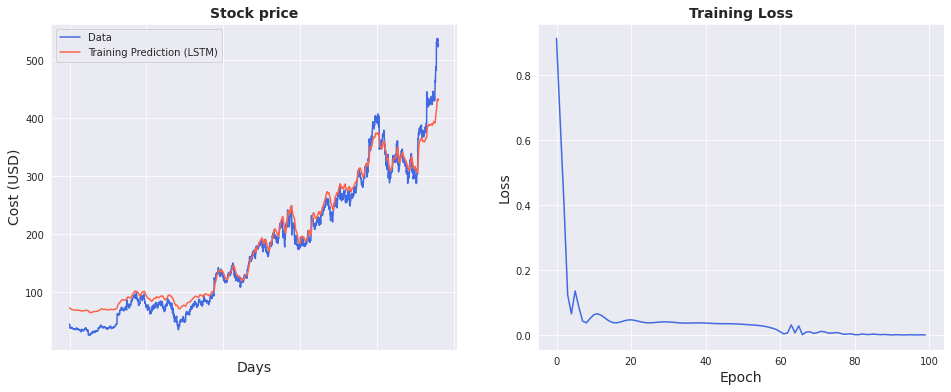

In [28]:
import seaborn as sns
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (LSTM)", color='tomato')
ax.set_title('Stock price', size = 14, fontweight='bold')
ax.set_xlabel("Days", size = 14)
ax.set_ylabel("Cost (USD)", size = 14)
ax.set_xticklabels('', size=10)


plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)